# Ковариация

## Диаграмма рассеивания

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

# загружаем датасет
pkmn = pd.read_csv('data/pkmn.csv')

# приводим заголовки полей к snake_case
pkmn.columns = pkmn.columns.str.lower().str.replace(' ', '_')

pkmn.columns

Index(['index', 'pokedex_number', 'name', 'type1', 'type2', 'gym.section',
       'attack', 'base_total', 'defense', 'experience_growth', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary',
       'level', 'additional.criteria', 'location', 'average.level',
       'against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fight', 'against_fire', 'against_flying', 'against_ghost',
       'against_grass', 'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock', 'against_steel',
       'against_water'],
      dtype='object')

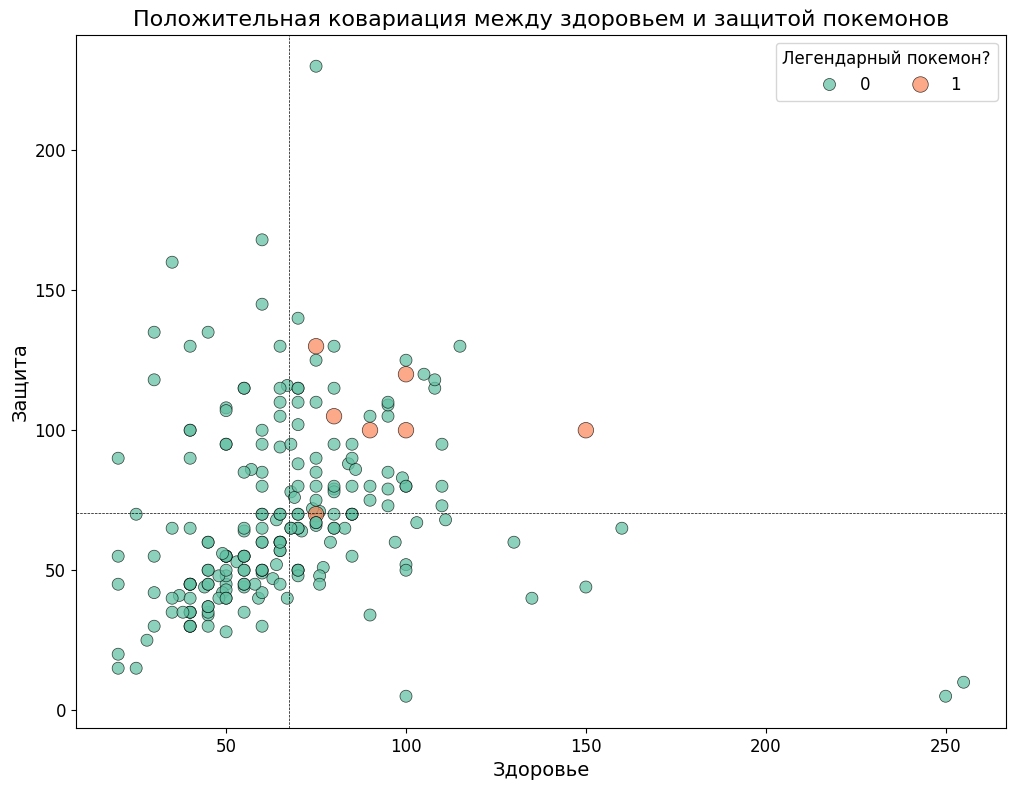

In [29]:
# задачем размеры фигуры
plt.figure(figsize = (12, 9))

# расчитываем средние значения для отображения линий
speed_avg = pkmn['hp'].mean()
defense_avg = pkmn['defense'].mean()

# формируем график
sns.scatterplot(x = pkmn['hp'], # здоровье
                y = pkmn['defense'], # защита
                hue = pkmn['is_legendary'], # флаг легендарного покемона
                palette = 'Set2', # цветовая палитра
                size = pkmn['is_legendary'], # зависимость размера от флага
                sizes = (125, 75), # настройка размеров маркера
                alpha=0.75, # уровень прозрачности маркера
                edgecolor='black', # цвет границы маркера
                linewidth = 0.5 # толщина границы маркера
            )

# настраиваем подписи
plt.title('Положительная ковариация между здоровьем и защитой покемонов', fontsize=16) 
plt.xlabel('Здоровье', fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel('Защита', fontsize = 14)
plt.yticks(fontsize = 12)

# настройка легенды
plt.legend(title = 'Легендарный покемон?', # заголовок легенды
           title_fontsize = 12, # размер шрифта заголовка легенды
           fontsize = 12, # размер шрифта 
           loc='upper right', # положение легенды
           ncol = 2) # количество заголовков

# линии средних занчений
plt.axvline(speed_avg, linestyle = '--', color = 'black', linewidth = 0.5)
plt.axhline(defense_avg, linestyle = '--', color = 'black', linewidth = 0.5)

# отобразить график
plt.show()

In [ ]:
# подготовка данных
emp = pd.read_csv('data/emp.csv')
# Копируем исходный DataFrame
emp_clear = emp.copy()

# Конвертируем 'Grade' в числовой тип
emp_clear['Grade'] = pd.to_numeric(emp_clear['Grade'], errors='coerce')

# Сортируем по зарплате (по убыванию)
emp_clear = emp_clear.sort_values(by='Base_Salary', ascending=False)

# Удаляем строки с NaN
emp_clear = emp_clear.dropna()



## SciPy


In [ ]:
# Выполним расчет ковариации с помощью библиотеки SciPy

corr = stats.pearsonr(emp_clear['Grade'], emp_clear['Base_Salary']).statistic

print(corr)

0.8217974113484171


## Pandas


In [36]:
# Выполним расчет ковариации с помощью библиотеки Pandas

corr_pd = emp_clear[['Grade', 'Base_Salary']].corr()

print(corr_pd.iloc[0,1])

0.8217974113484144


# Корреляция

In [32]:
from scipy.stats import pearsonr
# рассчитаем корреляцию показателей здоровья (hp) и защиты (defense)

# подготовка данных
# удаляем пустые строки
pkmn_clear = pkmn[['hp', 'defense']].dropna()

# рассчитаем ковариацию
hp_def_cov = np.cov(pkmn_clear['hp'], pkmn_clear['defense'])[0, 1]

# рассчитаем стандартное отклонение
hp_std = pkmn_clear['hp'].std()
def_std = pkmn_clear['defense'].std()

# Вычисляем коэффициент корреляции Пирсона
r = hp_def_cov / (hp_std * def_std)

# проверяем через встроенную функцию
r_scipy, _ = pearsonr(pkmn_clear['hp'], pkmn_clear['defense'])

print(f'Ручной рассчет {r:.2f}')
print(f'Проверка через встроенную функцию {r_scipy:.2f}')

# пришем выводы
if r < 0.3:
    print('Корреляция меньше 0.3 - очень слабая корреляция')
elif 0.3 <= r < 0.5:
    print('Корреляция в диапазоне от 0.3 до 0.5 - слабая корреляция')
elif 0.5 <= r < 0.7:
    print('Корреляция в лиапазоне от 0.5 до 0.7 - умеренная корреляция')
elif 0.7 <= r < 0.9:
    print('Корреляция в диапазоне от 0.7 до 0.9 - сильная корреляция')
else:
    print('Корреляция > 0.9 - очень сильная корреляция')


Ручной рассчет 0.11
Проверка через встроенную функцию 0.11
Корреляция меньше 0.3 - очень слабая корреляция


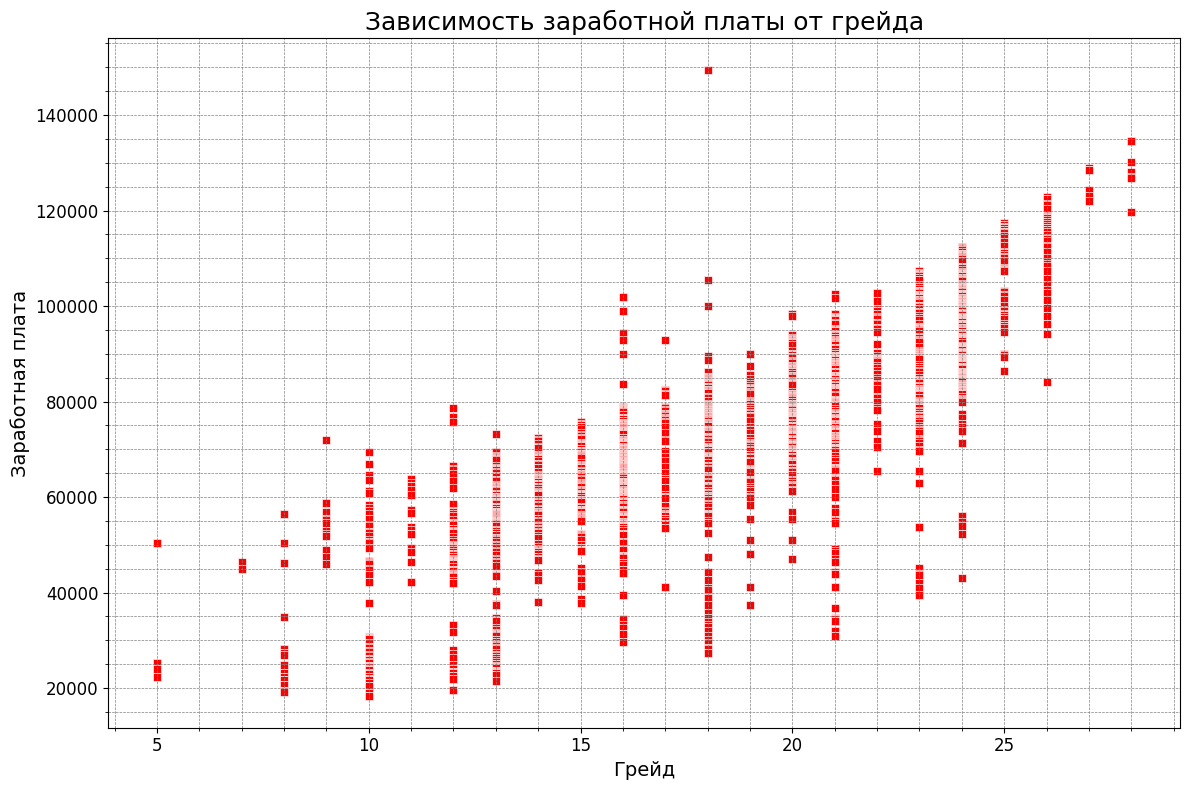

In [34]:
emp = pd.read_csv('data/emp.csv')
# Копируем исходный DataFrame
emp_clear = emp.copy()

# Конвертируем 'Grade' в числовой тип
emp_clear['Grade'] = pd.to_numeric(emp_clear['Grade'], errors='coerce')

# Сортируем по зарплате (по убыванию)
emp_clear = emp_clear.sort_values(by='Base_Salary', ascending=False)

# Удаляем строки с NaN
emp_clear = emp_clear.dropna()

# Задаем размеры фигуры для графика
plt.figure(figsize=(12, 8))

# Точечный график
sns.scatterplot(
    y='Base_Salary',
    x='Grade',
    data=emp_clear,
    marker='s',     # квадраты
    color='red',    # цвет точек
    edgecolor='white'  # белые границы
)

# Включаем минорный гридлайн
plt.minorticks_on()

# Настройка гридлйнов
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Заголовок и подписи осей
plt.title('Зависимость заработной платы от грейда', size=18)
plt.xlabel('Грейд', fontsize=14)
plt.ylabel('Заработная плата', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# автонастрйока размеров
plt.tight_layout()

plt.show()